# PROYECTO DATA SCIENCE ENGINEERING OF SCIENCE

### PREGUNTAS

- ¿Existe una correlación significativa entre la tasa de suicidios y el promedio de
ingresos a nivel nacional en diferentes países?, si es que existe ¿Cómo ha
evolucionado a lo largo de la última década?
- ¿Cómo han evolucionado las tasas de suicidios en diferentes países a lo largo de la
última década? (Países con mayor aumento y países con menor aumento)
- ¿Cómo influye la desigualdad de ingresos en la tasa de suicidios dentro de un país
en comparación con el nivel global?
- ¿Existe una relación entre la tasa de suicidios de un país por cada 100.000
habitantes y el nivel educativo de estos?
- ¿Cómo afecta la religión a la tasa de suicidios en diferentes países?
- ¿Cómo influye el acceso a la tecnología en la tasa de suicidios en diferentes grupos
demográficos?
- ¿Se relaciona la tasa de suicidios con la esperanza de vida de los países?


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import requests as rq
from bs4 import BeautifulSoup as bs

IMPORTAMOS LAS LIBRERIAS QUE USAREMOS

  ## 1. ¿Existe una correlación significativa entre la tasa de suicidios y el promedio de ingresos a nivel nacional en diferentes países? (Martín)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import requests as rq
from bs4 import BeautifulSoup as bs

In [22]:
#https://www.datosmundial.com/ingreso-promedio.php
ingresos_mundo= pd.read_csv('Datos/income.csv', sep=',')
ingresos_mundo.rename(columns={'LOCATION':'CodigoPais'}, inplace=True)
ingresos_mundo2019 = ingresos_mundo[ingresos_mundo["TIME"]==2019]
df_suicidio_oms= pd.read_excel('Datos/data.xlsx',skiprows=2)
pd.set_option('display.max_columns', None)
df_suicidio_oms.dropna(thresh=0.2, inplace=True)
df_suicidio_oms_clean=df_suicidio_oms[['ParentLocation','SpatialDimValueCode','Location','Period','Dim1','FactValueNumeric']]
df_suicidio_oms_clean.rename(columns={'SpatialDimValueCode':'CodigoPais'}, inplace=True)    
suicidios2009 = df_suicidio_oms_clean[df_suicidio_oms_clean['Period'] == 2009]
suicidios2009 = suicidios2009[suicidios2009['Dim1'] == "Both sexes"]
#haremos un merge de los datos de suicidios con los datos de ingresos
suicidios2019 = df_suicidio_oms_clean[df_suicidio_oms_clean['Period'] == 2019]
suicidios2019 = suicidios2019[suicidios2019['Dim1'] == "Both sexes"]
suicidios_ingresos2019 = suicidios2019.merge(ingresos_mundo2019, on="CodigoPais")
suicidios_ingresos2019.rename(columns={'Value':'IngresoPromedio'}, inplace=True)

/var/folders/yr/1dwzyqt511jb113_wtkjnp640000gn/T/ipykernel_6088/2871246876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suicidio_oms_clean.rename(columns={'SpatialDimValueCode':'CodigoPais'}, inplace=True)


In [23]:
#agregaremos una columna que diga correlacion entre los datos de suicidios y los ingresos
suicidios_ingresos2019['Correlacion'] = suicidios_ingresos2019['FactValueNumeric'] / suicidios_ingresos2019['IngresoPromedio']
#quitaremos las variables que no necesitamos
suicidios_ingresos2019.drop(['TIME','Flag Codes','INDICATOR', 'SUBJECT', 'ParentLocation','FREQUENCY','MEASURE','Dim1', 'Period', 'Location'], axis=1, inplace=True)
suicidios_ingresos2019.rename(columns={'FactValueNumeric':'Suicidios_por_100'}, inplace=True)
#ordenamos por ingreso promedio
suicidios_ingresos2019.sort_values(by=['IngresoPromedio'], inplace=True, ascending=False)

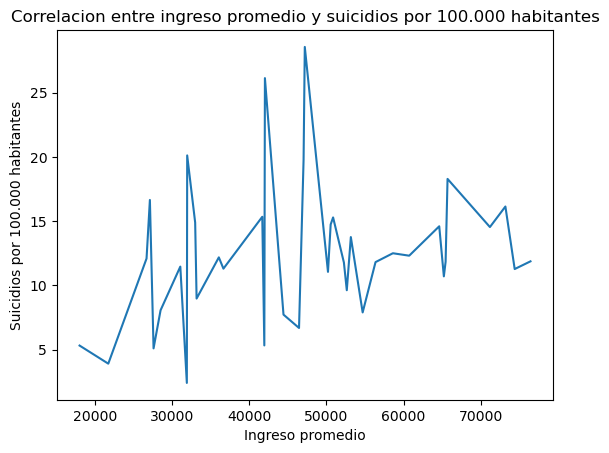

In [24]:
#graficamos la correlacion entre el ingreso promedio y los suicidios en como un lineplot
sns.lineplot(data=suicidios_ingresos2019, x="IngresoPromedio", y="Suicidios_por_100")
plt.title("Correlacion entre ingreso promedio y suicidios por 100.000 habitantes")
plt.xlabel("Ingreso promedio")
plt.ylabel("Suicidios por 100.000 habitantes")
plt.show()



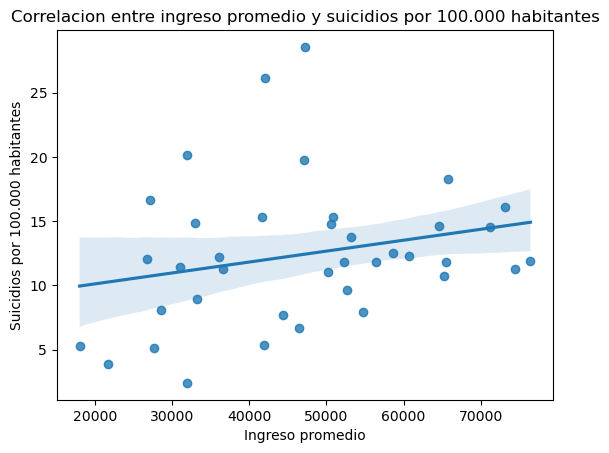

In [25]:
sns.regplot(data=suicidios_ingresos2019, x="IngresoPromedio", y="Suicidios_por_100")
plt.title("Correlacion entre ingreso promedio y suicidios por 100.000 habitantes")
plt.xlabel("Ingreso promedio")
plt.ylabel("Suicidios por 100.000 habitantes")
plt.show()

In [26]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_average_wage"
page = rq.get(url).text
soup = bs(page)
tables = soup.find_all('table')
table = soup.find('table')
df = pd.DataFrame(columns = ["Country", "2000", "2010", "2020", "2022"])

# iterar sobre cada fila ('tr') para completar la información
for row in table.find_all('tr')[1::]:
    cols = row.find_all("td")
    #print(cols)
    cols = [col.text.strip() for col in cols]
    #print(cols)
    country = cols[0]
    avg_wage_2000 = cols[1]
    avg_wage_2010 = cols[2]
    avg_wage_2020 = cols[3]
    avg_wage_2022 = cols[4]
    new_row = pd.Series(data={"Country":country, "2000":avg_wage_2000, "2010":avg_wage_2010, "2020":avg_wage_2020, "2022":avg_wage_2022})
    df = pd.concat([df, new_row], ignore_index=True)
df.head()


,Country,2000,2010,2020,2022,0
0,NaN,NaN,NaN,NaN,NaN,Iceland *
1,NaN,NaN,NaN,NaN,NaN,"57,008"
2,NaN,NaN,NaN,NaN,NaN,"54,268"
3,NaN,NaN,NaN,NaN,NaN,"71,687"
4,NaN,NaN,NaN,NaN,NaN,"79,473"


Podemos evidenciar claramente la tendencia que tienne los valores a ir aumentando a medida que los salarios aumentan, por lo tanto, podemos decir que existe una correcion positiva entre los salarios medios de los paises y la tasa de suicidios por cada 100 habitantes en base a los datos del año 2019.

## 2. ¿Cómo han evolucionado las tasas de suicidios en diferentes países a lo largo de la última década? (Países con mayor aumento y países con menor aumento) (Josías)

## 3. ¿Cómo influye la desigualdad de ingresos en la tasa de suicidios dentro de un país en comparación con el nivel global? (Akira)

# 4. ¿Existe una relación entre la tasa de suicidios de un país por cada 100.000 habitantes y el nivel educativo de estos? (Mati)

# 5. ¿Cómo afecta la religión a la tasa de suicidios en diferentes países? (Guiliad)

# 6. ¿Cómo influye el acceso a la tecnología en la tasa de suicidios en diferentes grupos demográficos?

# 7. ¿Se relaciona la tasa de suicidios con la esperanza de vida de los países?